In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
# pip install yfinance --upgrade --no-cache-dir <- 이거 bash terminal 에서 실행
from pandas import DataFrame

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

# 시계열 데이터 불러올 때, 날짜 인덱스로 불러올 때

In [15]:
df=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx")
df.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021/08/13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
1,2021/08/12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2,2021/08/11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
3,2021/08/10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
4,2021/08/09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      127 non-null    object 
 1   종가      127 non-null    int64  
 2   대비      127 non-null    int64  
 3   등락률     127 non-null    float64
 4   시가      127 non-null    int64  
 5   고가      127 non-null    int64  
 6   저가      127 non-null    int64  
 7   거래량     127 non-null    int64  
 8   거래대금    127 non-null    int64  
 9   시가총액    127 non-null    int64  
 10  상장주식수   127 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 11.0+ KB


In [17]:
# 일자 type이 object. 날짜 데이터를 아예 인덱스로 불러오기 위해서는, 불러 올 때, index_col = 0 으로 하면 됨.
df2=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      127 non-null    object 
 1   종가      127 non-null    int64  
 2   대비      127 non-null    int64  
 3   등락률     127 non-null    float64
 4   시가      127 non-null    int64  
 5   고가      127 non-null    int64  
 6   저가      127 non-null    int64  
 7   거래량     127 non-null    int64  
 8   거래대금    127 non-null    int64  
 9   시가총액    127 non-null    int64  
 10  상장주식수   127 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 11.0+ KB


C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [18]:
df2.head()

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021/08/13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021/08/12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021/08/11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021/08/10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021/08/09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [19]:
df1=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", parse_dates = ['일자']) 
# 어떤게 날짜인 컬럼인지 알면, 컬럼명 바로 parse_dates로 쓰면 됨ㄹ
df1.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      127 non-null    datetime64[ns]
 1   종가      127 non-null    int64         
 2   대비      127 non-null    int64         
 3   등락률     127 non-null    float64       
 4   시가      127 non-null    int64         
 5   고가      127 non-null    int64         
 6   저가      127 non-null    int64         
 7   거래량     127 non-null    int64         
 8   거래대금    127 non-null    int64         
 9   시가총액    127 non-null    int64         
 10  상장주식수   127 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 11.0 KB


In [21]:
# parse_dates = ['컬럼 명'] : 해당 컬럼이 날짜 형(datetime64[ns])이다. 라는 뜻
# 시계열 자료를 다룰 때는, 기본적으로 datete time으로 날짜 컬럼이 지정 되어 있어야 한다.
# 그럼 위에 자료를 날짜 데이터로 변환해야 한다. 해보자

In [22]:
df2=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", index_col=0)
df2.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021/08/13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021/08/12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021/08/11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021/08/10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021/08/09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [23]:
df2.index = pd.to_datetime(df2.index)
df2.head(1), type(df2.index)
# 날짜 인덱스를 type을 날짜 형으로 바꾸는 것!! (datetime) 

(               종가    대비   등락률     시가     고가     저가       거래량           거래대금  \
 일자                                                                            
 2021-08-13  74400 -2600 -3.38  75800  76000  74100  61270643  4575267536355   
 
                        시가총액       상장주식수  
 일자                                       
 2021-08-13  444151821720000  5969782550  ,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [24]:
#df2['일자'] = pd.to_date()
#df2.info()
# pandas.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=False, format=None, exact=<no_default>, unit=None, infer_datetime_format=<no_default>, origin='unix', cache=True)

In [25]:
df4=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", parse_dates=['일자'], index_col=0)
df4.head()

C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2021-08-13 to 2021-02-15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      127 non-null    int64  
 1   대비      127 non-null    int64  
 2   등락률     127 non-null    float64
 3   시가      127 non-null    int64  
 4   고가      127 non-null    int64  
 5   저가      127 non-null    int64  
 6   거래량     127 non-null    int64  
 7   거래대금    127 non-null    int64  
 8   시가총액    127 non-null    int64  
 9   상장주식수   127 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 10.9 KB


In [27]:
type(df4.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [28]:
df4.index

DatetimeIndex(['2021-08-13', '2021-08-12', '2021-08-11', '2021-08-10',
               '2021-08-09', '2021-08-06', '2021-08-05', '2021-08-04',
               '2021-08-03', '2021-08-02',
               ...
               '2021-02-26', '2021-02-25', '2021-02-24', '2021-02-23',
               '2021-02-22', '2021-02-19', '2021-02-18', '2021-02-17',
               '2021-02-16', '2021-02-15'],
              dtype='datetime64[ns]', name='일자', length=127, freq=None)

In [29]:
# 시계열 데이터일 때 이렇게 불러오는 것 매우 권장
# df4=pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx", parse_dates=['일자'], index_col=0)

# filter 메서드

In [30]:
from pandas import DataFrame

data = [
    [1416, 1416, 2994, 1755],
    [6.42, 17.63, 21.09, 13.93],
    [1.10, 1.49, 2.06, 1.88]
]

columns = ["2018/12", "2019/12", "2020/12", "2021/12(E)"]
index = ["DPS", "PER", "PBR"]

df = DataFrame(data=data, index=index, columns=columns)
df

,2018/12,2019/12,2020/12,2021/12(E)
DPS,1416.00,1416.00,2994.00,1755.00
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, DPS to PBR
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2018/12     3 non-null      float64
 1   2019/12     3 non-null      float64
 2   2020/12     3 non-null      float64
 3   2021/12(E)  3 non-null      float64
dtypes: float64(4)
memory usage: 120.0+ bytes


In [32]:
df.filter(items=['2018/12'])

,2018/12
DPS,1416.00
PER,6.42
PBR,1.10


In [33]:
df.filter(items=['PER'],axis=0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93


In [34]:
# filter도 행과 열 조회하는 거임. iloc, loc 처럼
# 근데 왜 filter 씀?
# 정규표현식 때문. 
# 정규표현식 활용해서 행과 열을 조회할 수 있음

In [35]:
# 정규 표현식으로 활용해서 행과 열 조회
df.filter(regex='2020')

,2020/12
DPS,2994.00
PER,21.09
PBR,2.06


In [36]:
# 정규표현식 ? 블로그

In [37]:
# 응 뭔가 달라

In [38]:
# 행을 조회할 건데, R이 들어간 것만 조회
df.filter(regex='R', axis = 0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [39]:
# 행을 조회할 건데, R로 끝나는 모든 패턴을 조회
df.filter(regex='R$', axis = 0)

,2018/12,2019/12,2020/12,2021/12(E)
PER,6.42,17.63,21.09,13.93
PBR,1.10,1.49,2.06,1.88


In [40]:
# 정규표현식 사용하면 원하는 행과 열 뽑아 낼 수 있음
# ex) 카드 명이 상품ㅁ명 수천개인데, 다 텍스트임. 근데 그 네임ㅇ에 원칙이 있음. 그러면 키워드로 원하는 행 뽑아 낼 수 있음.


# dd

In [41]:
data = [
    ["037730", "3R", 1510],
    ["036360", "3SOFT", 1790],
    ["005670", "ACTS", 1185]
]

columns = ["종목코드", "종목명", "현재가"]
df = DataFrame(data=data, columns=columns)
df.set_index("종목코드", inplace=True)
print(df)

          종목명   현재가
종목코드               
037730     3R  1510
036360  3SOFT  1790
005670   ACTS  1185


# 정렬하기
## .sort_values

In [42]:
df.sort_values(by='현재가')
print(df.sort_values(by='현재가'))
# 현재가 컬럼 기준으로 정렬

          종목명   현재가
종목코드               
005670   ACTS  1185
037730     3R  1510
036360  3SOFT  1790


## , ascending=False: 내림차순

In [43]:
# ascending=False : 내림차순 , = True 가 기본 값= 오름차순
print(df.sort_values(by='현재가',ascending=False))
print(df.sort_values(by='종목명',ascending=False))

          종목명   현재가
종목코드               
036360  3SOFT  1790
037730     3R  1510
005670   ACTS  1185
          종목명   현재가
종목코드               
005670   ACTS  1185
036360  3SOFT  1790
037730     3R  1510


## .sort_index()

In [44]:
df.index

Index(['037730', '036360', '005670'], dtype='object', name='종목코드')

In [45]:
print(df.sort_index()) # 기본값
print(df.sort_index(ascending=False)) # 역순

          종목명   현재가
종목코드               
005670   ACTS  1185
036360  3SOFT  1790
037730     3R  1510
          종목명   현재가
종목코드               
037730     3R  1510
036360  3SOFT  1790
005670   ACTS  1185


# 인덱스 연산
- 집합 연산 개념이 들어가 있음. 이를 통해 데이터 병합할 때 사용
## union: 합집합

In [46]:
# 인덱스 연산:
idx1=pd.Index([1, 2, 3])
idx2=pd.Index([2,3,4])
print(idx1.union(idx2))

Index([1, 2, 3, 4], dtype='int64')


## intersection : 교집합

In [47]:
print(idx1.intersection(idx2))

Index([2, 3], dtype='int64')


## difference : 차집합

In [48]:
print(idx1.difference(idx2))

Index([1], dtype='int64')


# Groupby 연산
- 참고: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
- 연습할 것: https://pandas.pydata.org/docs/user_guide/timeseries.html


In [49]:
data = [
    ["2차전지(생산)", "SK이노베이션", 10.19, 1.29],
    ["해운", "팬오션", 21.23, 0.95],
    ["시스템반도체", "티엘아이", 35.97, 1.12],
    ["해운", "HMM", 21.52, 3.20],
    ["시스템반도체", "아이에이", 37.32, 3.55],
    ["2차전지(생산)", "LG화학", 83.06, 3.75]
]

columns = ["테마", "종목명", "PER", "PBR"]
df = DataFrame(data=data, columns=columns)
print(df)


         테마      종목명    PER   PBR
0  2차전지(생산)  SK이노베이션  10.19  1.29
1        해운      팬오션  21.23  0.95
2    시스템반도체     티엘아이  35.97  1.12
3        해운      HMM  21.52  3.20
4    시스템반도체     아이에이  37.32  3.55
5  2차전지(생산)     LG화학  83.06  3.75


In [50]:
# groupby 해보기
result = df.groupby("테마")[["PER","PBR"]]
print(result)
print(type(result))
df

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,테마,종목명,PER,PBR
0,2차전지(생산),SK이노베이션,10.19,1.29
1,해운,팬오션,21.23,0.95
2,시스템반도체,티엘아이,35.97,1.12
3,해운,HMM,21.52,3.20
4,시스템반도체,아이에이,37.32,3.55
5,2차전지(생산),LG화학,83.06,3.75


In [51]:
# result = df.groupby("테마")[["PER","PBR"]]
# 얘는 어떻게 나오는거지...
# 암튼 넘어가자
# group by 연산 연습 할 때 이해해보자

In [52]:
result2 = df.groupby("테마")[["PER","PBR"]].mean()
print(result2)
print(type(result2))

             PER    PBR
테마                     
2차전지(생산)  46.625  2.520
시스템반도체    36.645  2.335
해운        21.375  2.075
<class 'pandas.core.frame.DataFrame'>


In [53]:
# 요기까지가 분석해야할 테이블. 그걸 한번 본것. 나중에는 굉장히 데이터가 커짐
# 그래서 group by 가 중요

## .get_group
- get_group : 테마로 그룹화한 것 안에서 쪼개

In [54]:
print(df.groupby("테마").get_group("2차전지(생산)"))
print(df.groupby("테마").get_group("시스템반도체"))
print(df.groupby("테마").get_group("해운"))

         테마      종목명    PER   PBR
0  2차전지(생산)  SK이노베이션  10.19  1.29
5  2차전지(생산)     LG화학  83.06  3.75
       테마   종목명    PER   PBR
2  시스템반도체  티엘아이  35.97  1.12
4  시스템반도체  아이에이  37.32  3.55
   테마  종목명    PER   PBR
1  해운  팬오션  21.23  0.95
3  해운  HMM  21.52  3.20


In [55]:
df.groupby("테마").get_group("2차전지(생산)")

,테마,종목명,PER,PBR
0,2차전지(생산),SK이노베이션,10.19,1.29
5,2차전지(생산),LG화학,83.06,3.75


In [56]:
df.groupby("테마").get_group("시스템반도체")

,테마,종목명,PER,PBR
2,시스템반도체,티엘아이,35.97,1.12
4,시스템반도체,아이에이,37.32,3.55


In [57]:
df.groupby("테마").get_group("해운")

,테마,종목명,PER,PBR
1,해운,팬오션,21.23,0.95
3,해운,HMM,21.52,3.20


In [58]:
# 얘를 내보내야함. 그게 문제. <- vs code 서서

In [59]:
# result = df.groupby("테마")[["PER","PBR"]].mean()
# result.to_csv("c:/Archiving/IMDGB/20241004/output/result_csv_240930.xlsx")
# 오 된다. 왜 그래프는 안되지 <- vs code 에서

## Groupby 심화

In [174]:
df = pd.read_excel("c:/Archiving/IMDGB/step02_ds_basic/dataset/ss_ex_1.xlsx" , parse_dates=['일자'], index_col=0)
print(df.head())

               종가    대비   등락률     시가     고가     저가       거래량           거래대금  \
일자                                                                            
2021-08-13  74400 -2600 -3.38  75800  76000  74100  61270643  4575267536355   
2021-08-12  77000 -1500 -1.91  77100  78200  76900  42365223  3276635421700   
2021-08-11  78500 -1700 -2.12  79600  79800  78500  30241137  2389977254924   
2021-08-10  80200 -1300 -1.60  82300  82400  80100  20362639  1643107615500   
2021-08-09  81500     0  0.00  81500  82300  80900  15522581  1267668377900   

                       시가총액       상장주식수  
일자                                       
2021-08-13  444151821720000  5969782550  
2021-08-12  459673256350000  5969782550  
2021-08-11  468627930175000  5969782550  
2021-08-10  478776560510000  5969782550  
2021-08-09  486537277825000  5969782550  


C:\Archiving\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [175]:
df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550


In [169]:
# 이런 파일 가져오면, 연도/월/일로 쪼개서 관리할 수 있다.

In [178]:
df2 = df.reset_index()
df.head()

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [179]:
df2.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550


In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      127 non-null    datetime64[ns]
 1   종가      127 non-null    int64         
 2   대비      127 non-null    int64         
 3   등락률     127 non-null    float64       
 4   시가      127 non-null    int64         
 5   고가      127 non-null    int64         
 6   저가      127 non-null    int64         
 7   거래량     127 non-null    int64         
 8   거래대금    127 non-null    int64         
 9   시가총액    127 non-null    int64         
 10  상장주식수   127 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 11.0 KB


In [182]:
# pandas datetime 이용
print(df2['일자'].dt.quarter) # 분기 정보가 나온다
print(df2['일자'].dt.year) # 연 정보가 나온다
print(df2['일자'].dt.month) # 월 정보가 나온다
print(df2['일자'].dt.day) # 일 정보가 나온다

0      3
1      3
2      3
3      3
4      3
      ..
122    1
123    1
124    1
125    1
126    1
Name: 일자, Length: 127, dtype: int32
0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
122    2021
123    2021
124    2021
125    2021
126    2021
Name: 일자, Length: 127, dtype: int32
0      8
1      8
2      8
3      8
4      8
      ..
122    2
123    2
124    2
125    2
126    2
Name: 일자, Length: 127, dtype: int32
0      13
1      12
2      11
3      10
4       9
       ..
122    19
123    18
124    17
125    16
126    15
Name: 일자, Length: 127, dtype: int32


In [183]:
# 참고: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
# 연습할 것: https://pandas.pydata.org/docs/user_guide/timeseries.html

In [184]:
# 위에서 구한 분기, 연, 월, 일 을 컬럼에 추가해보자

In [185]:
# column 추가
df2['분기'] = df2['일자'].dt.quarter
df2['연도'] = df2['일자'].dt.year 
df2['월'] = df2['일자'].dt.month
df2['일'] = df2['일자'].dt.day
print(df2.head())

          일자     종가    대비   등락률     시가     고가     저가       거래량           거래대금  \
0 2021-08-13  74400 -2600 -3.38  75800  76000  74100  61270643  4575267536355   
1 2021-08-12  77000 -1500 -1.91  77100  78200  76900  42365223  3276635421700   
2 2021-08-11  78500 -1700 -2.12  79600  79800  78500  30241137  2389977254924   
3 2021-08-10  80200 -1300 -1.60  82300  82400  80100  20362639  1643107615500   
4 2021-08-09  81500     0  0.00  81500  82300  80900  15522581  1267668377900   

              시가총액       상장주식수  분기    연도  월   일  
0  444151821720000  5969782550   3  2021  8  13  
1  459673256350000  5969782550   3  2021  8  12  
2  468627930175000  5969782550   3  2021  8  11  
3  478776560510000  5969782550   3  2021  8  10  
4  486537277825000  5969782550   3  2021  8   9  


In [186]:
df2.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,분기,연도,월,일
0,2021-08-13,74400,-2600,-3.38,75800,76000,74100,61270643,4575267536355,444151821720000,5969782550,3,2021,8,13
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550,3,2021,8,12
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550,3,2021,8,11
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550,3,2021,8,10
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550,3,2021,8,9


In [187]:
# 묶기 groupby 사용
result = df2.groupby(['연도', '월']).get_group((2021, 2))
result.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,분기,연도,월,일
117,2021-02-26,82500,-2800,-3.28,82800,83400,82000,38520800,3175845143233,492507060375000,5969782550,1,2021,2,26
118,2021-02-25,85300,3300,4.02,84000,85400,83000,34155986,2880259491180,509222451515000,5969782550,1,2021,2,25
119,2021-02-24,82000,0,0.00,81800,83600,81300,26807651,2208585141393,489522169100000,5969782550,1,2021,2,24
120,2021-02-23,82000,-200,-0.24,81200,82900,81100,20587314,1683933027000,489522169100000,5969782550,1,2021,2,23
121,2021-02-22,82200,-400,-0.48,83800,84200,82200,25419886,2113624966100,490716125610000,5969782550,1,2021,2,22


In [189]:
result2 = df2.groupby(['연도','월'])['시가'].mean()
result2

연도    월
2021  2    83130.000000
      3    82250.000000
      4    83786.363636
      5    80547.368421
      6    81195.454545
      7    79645.454545
      8    80230.000000
Name: 시가, dtype: float64

In [190]:
# 각 월별 종가, 저가, 고가 알고 싶은거
# 이떈 딕셔너리가 필요함
multiples = {
   "시가" : "first",
   "저가" : min,
   "고가" : max,
   "종가" : 'last' 
}
result3 = df2.groupby(['연도','월']).agg(multiples)
print(result3)
# group by 어렵..
print(result3.reset_index()) # 리셋 인덱스 해야 처리하기 쉬움. ..아님 각 컬럼을 만드는게 나음. 

           시가     저가     고가     종가
연도   월                            
2021 2  82800  81000  86000  84200
     3  82400  80600  85300  83600
     4  81900  81500  86200  82900
     5  80300  78400  83500  81700
     6  81100  79600  83000  80600
     7  78900  78100  81300  80100
     8  75800  74100  83300  79300
     연도  월     시가     저가     고가     종가
0  2021  2  82800  81000  86000  84200
1  2021  3  82400  80600  85300  83600
2  2021  4  81900  81500  86200  82900
3  2021  5  80300  78400  83500  81700
4  2021  6  81100  79600  83000  80600
5  2021  7  78900  78100  81300  80100
6  2021  8  75800  74100  83300  79300


C:\Users\chaer\AppData\Local\Temp\ipykernel_26248\421030939.py:9: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\chaer\AppData\Local\Temp\ipykernel_26248\421030939.py:9: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



# plotly 시각화 연습 

In [92]:
import plotly

plotly.__version__

'5.24.1'

In [93]:
import plotly.graph_objects as go #matplotlib 와 개념 유사

In [94]:
fig = go.Figure()

# 기본적인 자료형은 list를 참조함
fig.add_trace(go.Bar(x=[1,2,3],y=[1,5,3]))

fig.show()

In [95]:
import plotly.express as px # seaborn과 개념적으로 유사

In [96]:
iris = px.data.iris()
# iris.head()

# pandas dataframe이랑 seaborn 바로 연결됨. 얘도 그럼.. <- ㅔ? -> 아하, 바로 data = iris, x=, y=로 쓸 수 있따. ㅇㅋ

fig = px.scatter(iris, x='sepal_length', y='sepal_width')

fig.show()

In [97]:
iris = px.data.iris()
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color = 'species')
fig.show()

In [98]:
iris = px.data.iris()
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color = 'species')

fig.add_trace(
    go.Scatter( 
        x = [4.5, 7.5], # line 그리려고
        y = [4, 2],
        mode = "lines",
        line = go.scatter.line(color = 'red'),
        showlegend=False
    )
)
fig.show()

AttributeError: module 'plotly.graph_objs.scatter' has no attribute 'line'

In [99]:
# d왜 안나오지

In [100]:
iris = px.data.iris()
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color = 'species')

fig.add_trace(
    go.Scatter( 
        x = [4.5, 7.5], # line 그리려고
        y = [4, 2],
        mode = "markers",
        marker=dict(size=20, color='red'),
        showlegend=False
    )
)
fig.show()

In [101]:
# 위가 전형적인 plotly 시각화 문법 구조

# plotly 기본 문법
- https://plotly.com/python/plotly-express/

## express

In [102]:
fig = px.bar(x = ["a", "b", "c"] , y=[1, 3, 2], width=600, height=300)
fig.show()

## graph object 방식

In [103]:
fig = go.Figure(data = [go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])])

fig.show()

### .update_layout 등
- 옵션 작업은 다 여기에서 해야함

In [104]:
# 픽셀 조정 등 -> .update_layout  # update_layout이 그래프 외곽 관련된 모든걸 컨트롤 한다...
fig = go.Figure(data = [go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])])
fig.update_layout(width = 600,
                  height = 300,
                 margin_l = 50,
                  margin_r = 50,

                  # 백그라운드 색상 지정
                  paper_bgcolor = "lightblue"
                 )
fig.show()

## 타이틀 쓰기

### express

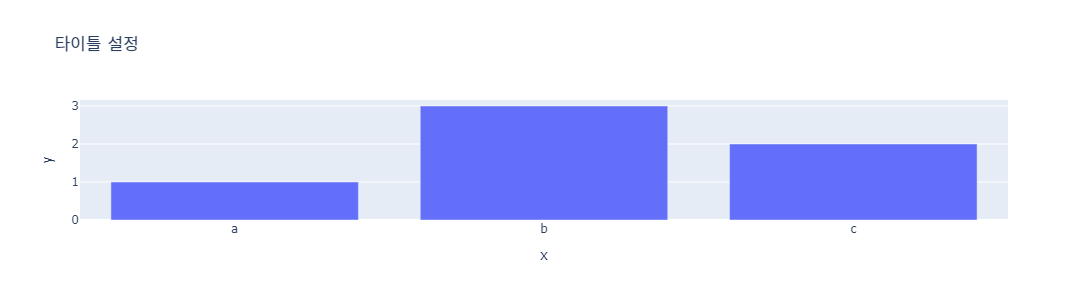

In [105]:
fig = px.bar(x = ["a", "b", "c"], 
             y=[1, 3, 2], width=600, height=300,
            title = "타이틀 설정")
fig.show()

### graph object

In [106]:
## graph object 에서도 해보자

fig = go.Figure(data = [go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])],
               layout = go.layout(title=go.layout.Title(text = 'Title 설정'))
               )
fig.update_layout(width = 600,
                  height = 300,
                 margin_l = 50,
                  margin_r = 50,

                  # 백그라운드 색상 지정
                  paper_bgcolor = "lightblue"
                 )
fig.show()

TypeError: 'module' object is not callable

In [107]:
# 왜 안되냐고!!!!!!!!!!!1

In [114]:
#강사님 코드
# plotly에서 그리는 방식 두 가지: express / graph object
# 근데 어쨌든 그래프 다듬을 땐 , .update_layout 을 통해 해결하는 코드 구조를 짜면 됨.

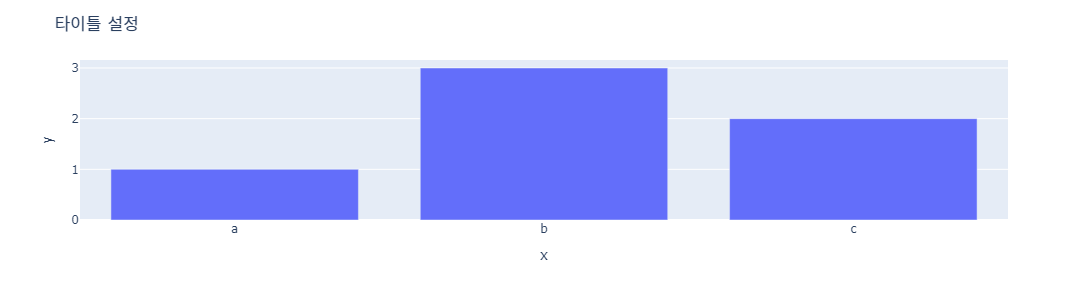

In [112]:
# express
fig = px.bar(x = ["a", "b", "c"], 
             y = [1, 3, 2], width = 600, height = 300)

fig.update_layout(title_text = '타이틀 설정')

fig.show()

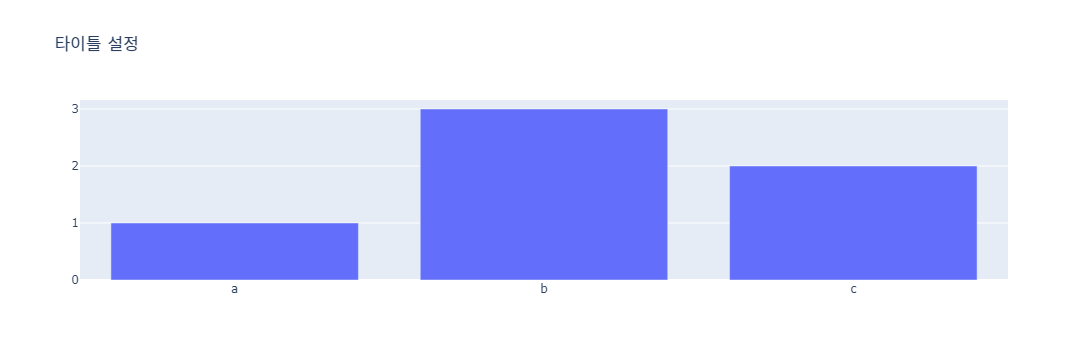

In [113]:
# graph_object 
fig = go.Figure(data=[go.Bar(x = ["a", "b", "c"], y = [1, 3, 2])])
fig.update_layout(title_text = '타이틀 설정')
fig.show()

In [115]:
# .add_trace 가 머라구요??

In [116]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.12,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.33,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.93,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.10,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.93,13177000,16788.62948,AUS,36


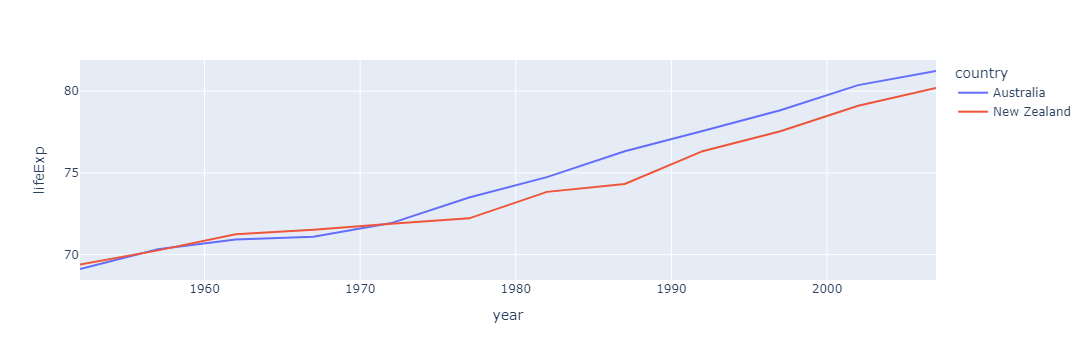

In [117]:
fig = px.line(df, x= 'year', y='lifeExp', color = 'country')

fig.show()

In [118]:
# layout(그래프 외부) 가 아니라 그래프 내부를 변경하고 싶다! => update_traces()

## update_traces()
- https://plotly.com/python-api-reference/generated/generated/plotly.graph_objects.Figure.update_traces.html#plotly-graph-objs-figure-update-traces
- add_traces() 도 공부하셈

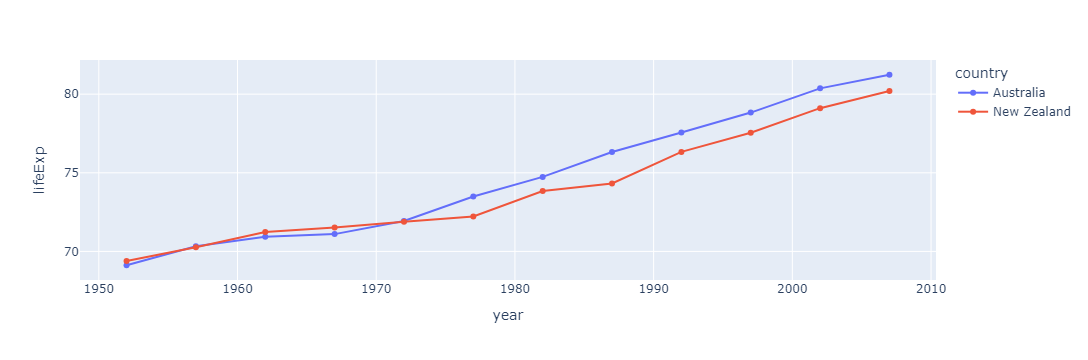

In [119]:
# marker랑 뭘 더 주고 싶다.

fig = px.line(df, x= 'year', y='lifeExp', color = 'country')

fig.update_traces(mode = 'markers+lines')

fig.show()

In [123]:
# Figure.update_traces(patch=None, selector=None, row=None, col=None, secondary_y=None, overwrite=False, **kwargs)
# 보면, **kwargs -> 님이 무슨 차트 그릴지 모르니 가변인수로 받겠음.
# 그러면 내가 line이든 scatter 이든 내가 그리려는 차트 바꾸려면, 그 차트 클래스로 들어가야함.
# 옵션 찾는게 쉽지 않음

# 챗지피티 한테 물을 때도 그런 걸 알고 물어야함

In [122]:
#fig = px.line(df, x= 'year', y='lifeExp', color = 'country')
#fig.update_traces(mode = 'markers+lines')
#fig.show()

# Hover 설정
 - 마우스 갖다 댔을 때 나오는 거
 - update_layout으로 설정

## update_layout

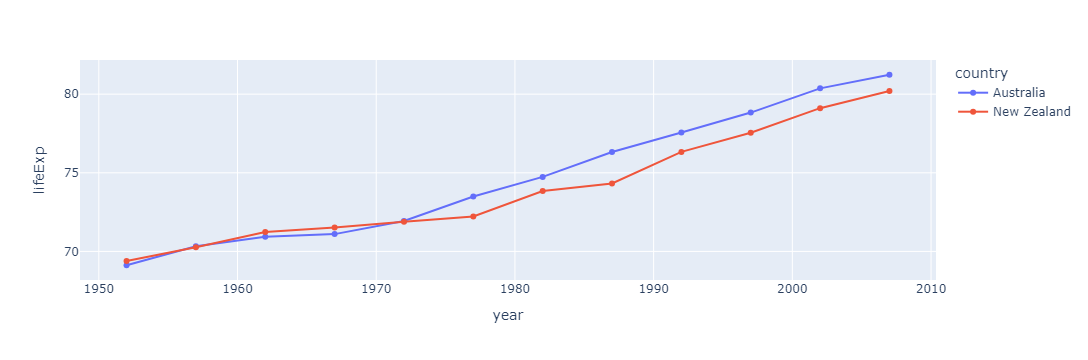

In [124]:
fig = px.line(df, x= 'year', y='lifeExp', color = 'country')

fig.update_traces(mode = 'markers+lines')

# hover 설정
fig.update_layout(hovermode='x')

fig.show()

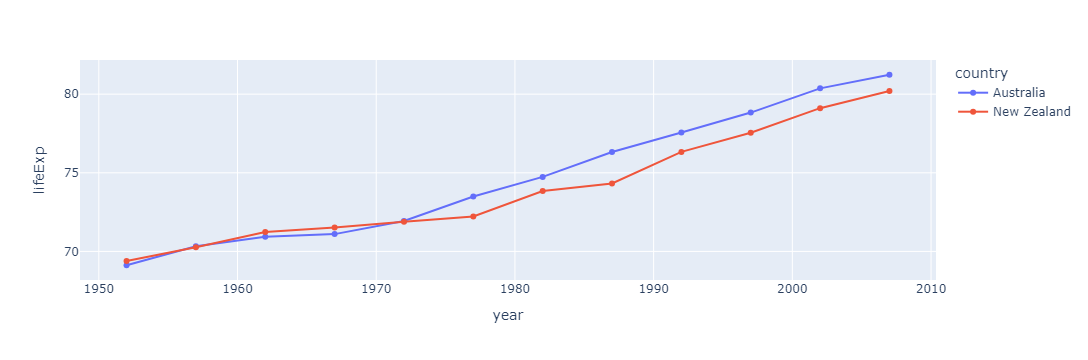

In [125]:
fig = px.line(df, x= 'year', y='lifeExp', color = 'country')

fig.update_traces(mode = 'markers+lines')

# hover 설정
fig.update_layout(hovermode='y')

fig.show()

## hover mode의 폰트 등 변경 -> update_layout

# 캔들 차트
- https://plotly.com/python/candlestick-charts/

In [127]:
import yfinance as yf
import plotly.graph_objects as go

In [128]:
indo = yf.download('INDO', start = '2023-01-01', end='2024-09-30')
indo.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,4.63,4.67,4.40,4.58,4.58,121100
2023-01-04,4.45,4.68,4.45,4.66,4.66,115800
2023-01-05,4.56,4.90,4.55,4.86,4.86,99800
2023-01-06,4.88,5.22,4.88,5.01,5.01,181300
2023-01-09,5.37,5.85,5.19,5.76,5.76,434700


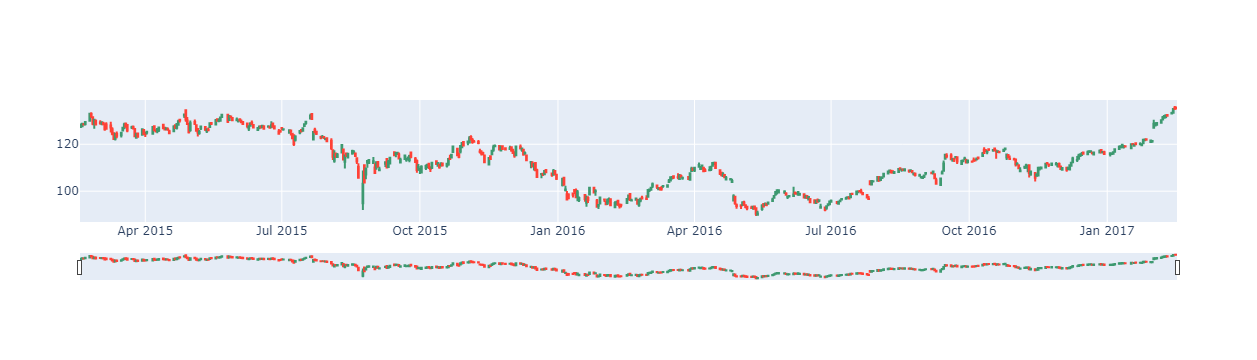

In [145]:
# 위 링크에서 샘플 코드 복사한 것
# 복사해왔을 때는 데이터 상태를 확인해야 함. 그래야 복붙으로 쓸 수 있는지 알 수 이으니
import pandas as pd
from datetime import datetime

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
# 데이터를 url로 가져옴
# 깃허브에다가 레포 하나 만들고, 누군가가 만들어서 그 링크르 다른 사람들한테 공유하면, 그걸 이어서 받아서 작업할 수 있음..... 팀플하기전에 고려기기

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'],
                high=df['AAPL.High'],
                low=df['AAPL.Low'],
                close=df['AAPL.Close'])])

fig.show()

In [132]:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [134]:
indo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,4.63,4.67,4.40,4.58,4.58,121100
2023-01-04,4.45,4.68,4.45,4.66,4.66,115800
2023-01-05,4.56,4.90,4.55,4.86,4.86,99800
2023-01-06,4.88,5.22,4.88,5.01,5.01,181300
2023-01-09,5.37,5.85,5.19,5.76,5.76,434700


In [135]:
indo.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,4.63,4.67,4.400,4.58,4.58,121100
1,2023-01-04,4.45,4.68,4.450,4.66,4.66,115800
2,2023-01-05,4.56,4.90,4.550,4.86,4.86,99800
3,2023-01-06,4.88,5.22,4.880,5.01,5.01,181300
4,2023-01-09,5.37,5.85,5.190,5.76,5.76,434700
...,...,...,...,...,...,...,...
432,2024-09-23,2.69,2.78,2.630,2.76,2.76,505700
433,2024-09-24,2.76,2.77,2.615,2.65,2.65,441300
434,2024-09-25,2.67,2.67,2.510,2.55,2.55,513600
435,2024-09-26,2.48,2.51,2.380,2.43,2.43,332300


In [137]:
indo2 = indo.reset_index()
indo2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,4.63,4.67,4.40,4.58,4.58,121100
1,2023-01-04,4.45,4.68,4.45,4.66,4.66,115800
2,2023-01-05,4.56,4.90,4.55,4.86,4.86,99800
3,2023-01-06,4.88,5.22,4.88,5.01,5.01,181300
4,2023-01-09,5.37,5.85,5.19,5.76,5.76,434700


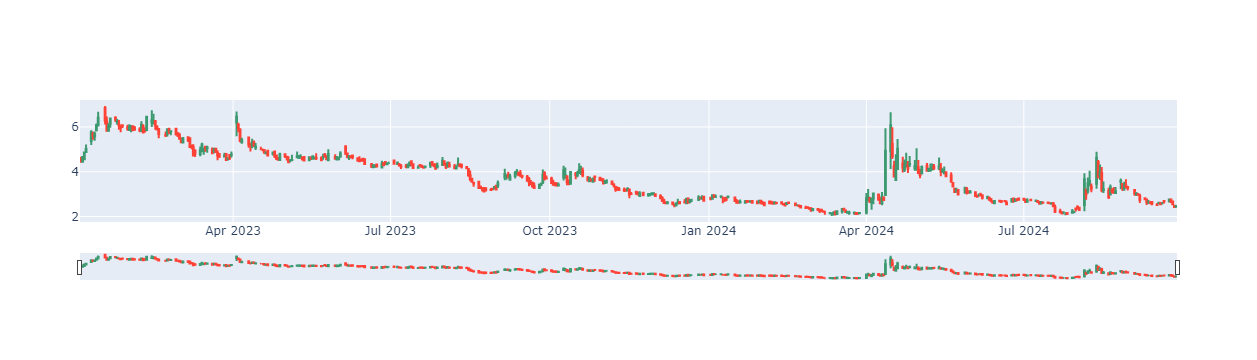

In [148]:
# sol 1
fig = go.Figure(data=[go.Candlestick(x=indo2['Date'],
                open=indo2['Open'],
                high=indo2['High'],
                low=indo2['Low'],
                close=indo2['Close'])])

fig.show()

In [153]:
# sol2 <- 어쩌라고
fig = go.Figure(data=[go.Candlestick(x=indo['Date'].index(),
                open=indo['Open'],
                high=indo['High'],
                low=indo['Low'],
                close=indo['Close'])])

fig.show()

KeyError: 'Date'

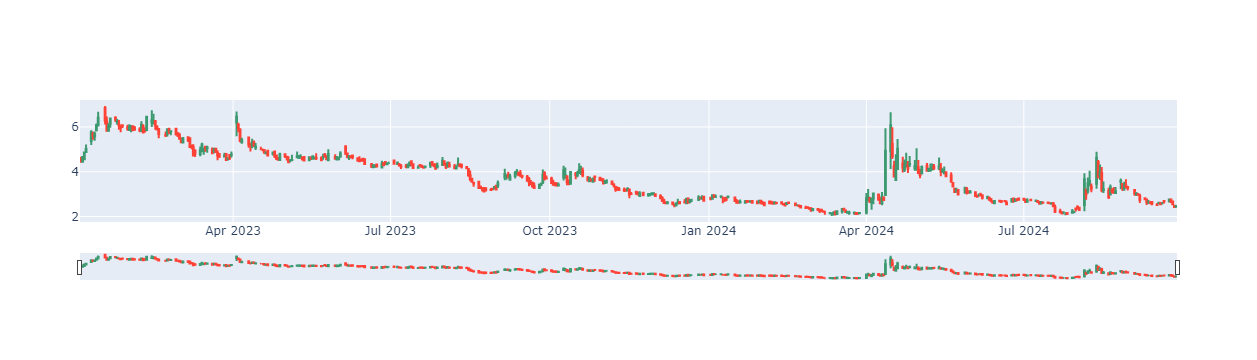

In [154]:
fig = go.Figure(data=[go.Candlestick(x=indo2['Date'],
                open=indo2['Open'],
                high=indo2['High'],
                low=indo2['Low'],
                close=indo2['Close'])])

# update_layout
# q_차트제목 ,축 레이블 설정

fig.show()


# update_layout

# update_traces 

# 둘 중에 챗지피티가 뭘쓰는지 봐야함

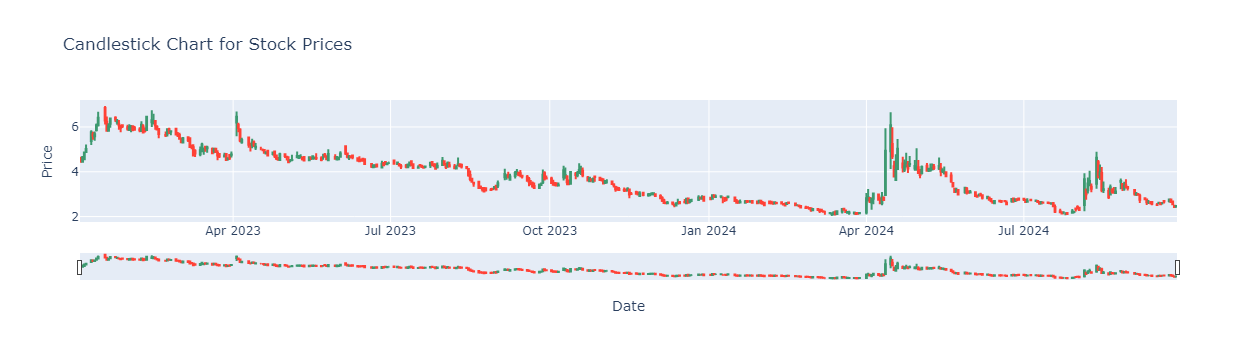

In [156]:
# 챗지피티 답변 -> 차트제목 과 축 레이블은 차트 레이아웃으로 판단 -> update_layout

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=indo2['Date'],
                open=indo2['Open'],
                high=indo2['High'],
                low=indo2['Low'],
                close=indo2['Close'])])

# 차트 제목과 축 레이블 설정
fig.update_layout(
    title='Candlestick Chart for Stock Prices',  # 차트 제목
    xaxis_title='Date',  # x축 레이블
    yaxis_title='Price',  # y축 레이블
)

# 차트 출력
fig.show()


In [157]:
# update_layout은 차트 종류에 상관업싱 쓸 수 있음. 그래서 공부해 놓고 어디 써놓으면 다른 차트에도 적용 가능
# update_traces는 차트마다 다르니 안됨

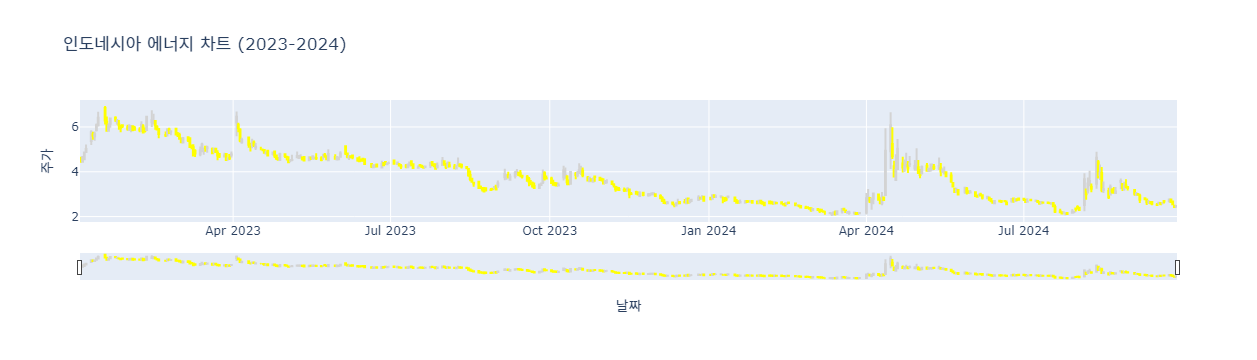

In [161]:
# 캔틀 차트의 색상을 변경해보자 feat . chat gpt


import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=indo2['Date'],
                open=indo2['Open'],
                high=indo2['High'],
                low=indo2['Low'],
                close=indo2['Close'])])

# 차트 제목과 축 레이블 설정
fig.update_layout(
    title='인도네시아 에너지 차트 (2023-2024)',  # 차트 제목
    xaxis_title='날짜',  # x축 레이블
    yaxis_title='주가',  # y축 레이블
)

# update_traces()를 사용하여 색상 변경
fig.update_traces(
    increasing_line_color='lightgray',  # 상승 봉의 색상
    decreasing_line_color='yellow'  # 하락 봉의 색상
)

# 차트 출력
fig.show()


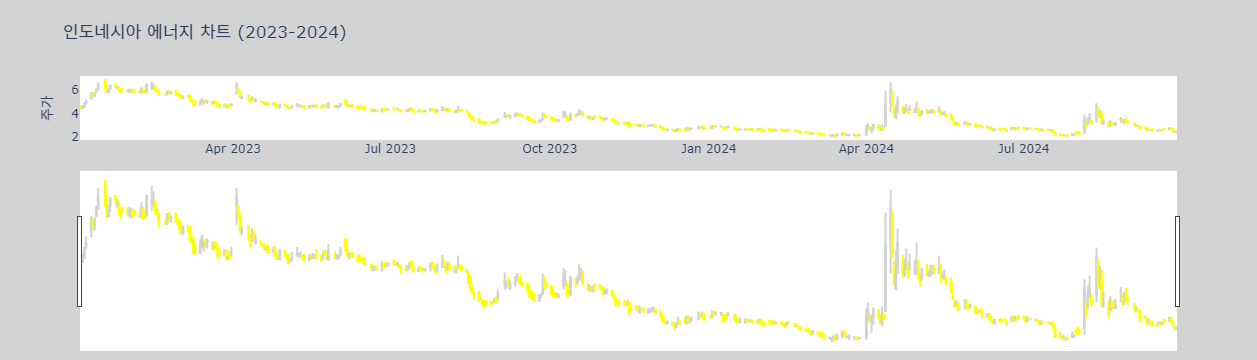

In [168]:
# 캔틀 차트의 색상을 변경해보자 feat . chat gpt


import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=indo2['Date'],
                open=indo2['Open'],
                high=indo2['High'],
                low=indo2['Low'],
                close=indo2['Close'])])

# 차트 제목과 축 레이블 설정
fig.update_layout(
    title='인도네시아 에너지 차트 (2023-2024)',  # 차트 제목
    xaxis_title='날짜',  # x축 레이블
    yaxis_title='주가',  # y축 레이블
    hovermode='x',
    xaxis_rangeslider_visible=True,
    xaxis_rangeslider_thickness=1,
    paper_bgcolor='lightgray',
    plot_bgcolor = 'white',
)

# update_traces()를 사용하여 색상 변경
fig.update_traces(
    increasing_line_color='lightgray',  # 상승 봉의 색상
    decreasing_line_color='yellow'  # 하락 봉의 색상
)



# 차트 출력
fig.show()


In [167]:
# update_layout과 update_traces 구별할 줄 알아야 함.